In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd. read_csv("Micro Credit Defaulter Project.csv", parse_dates=['pdate'])

# Getting the basic outlook over the project

In [4]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Observations:
    
    1.I went through all the columns ,for analysis purpose the msisdn column wont help because its just an identification of the person

In [5]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [6]:
df.shape

(209593, 37)

Observations:
    
    1.There are 209593 rows and 37 columns

In [7]:
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

Observations:
    
    1.Data is quite precise on dtypes because there are columns which are particularly should be in int ,all those columns are exactly as aspected

In [8]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

Observations:
    
    1.There are 209593 rows but we have only 186243 mobile numbers, intresting thing is that there are no null values in msisdn column and many numbers have been repeated.
    2.We have only one pcircle for whole dataset infering that the total data been collected from a particular region, and the final model build from this dataset will be good at analysing if the person from the UPW pcircle

In [9]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Observations:
    
    1.There are 37 columns.

In [10]:
for col in df:
    print('The name of the column is:',col)
    print(df[col].value_counts())
    print('\n')

The name of the column is: Unnamed: 0
2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64


The name of the column is: label
1    183431
0     26162
Name: label, dtype: int64


The name of the column is: msisdn
04581I85330    7
47819I90840    7
67324I84453    6
55809I89238    6
30080I90588    6
              ..
28073I90586    1
01501I82737    1
91639I85349    1
75197I90589    1
02822I70780    1
Name: msisdn, Length: 186243, dtype: int64


The name of the column is: aon
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64


The name of the column is: daily_decr30
0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.0000

Observations:
    
    1.Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) is less than 1000 in most of the general cases.
    2.Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) is less than 1000 in most of the general cases and its zero in 4063 cases and second highest is 781.
    3.Average main account balance over last 30 days is 0 in 7.5k cases and the majority average account balance falls less than 400,
    4.from the column number of days till last recharge of main account it indicates that 208000 users recharged within last 365 days(df.loc[(df['last_rech_date_ma']<180)]) and same the case with data account also.
    5.In the column of number of times main account got recharged in last 30 days,75% of the user recharge their main account maximum of 5 times in a month, and there are even cases where people recharge more 50+ times also in a month.
    6.There are 2 lakh 8 thoudands user who recharge for an amout less 1000 per month.
    7.Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah) is 1539 and second highest recharge option was 730.
    8.In most of the cases the user is going to recharge when the meadian main account balance falls below 100,(df.loc[(df['medianmarechprebal30']<100)]).
    9.Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) falls below 5 or less than 5 in 50% of the cases.
    10.Frequency of main account recharged in last 90 days in 1.3L cases it is less than 5 times.
    11.60% of the user kept an total amout in the main account in last 90 days is less than 7000.(df.loc[(df["sumamnt_ma_rech90"]<7000)])
    12.Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    13.Number of times data account got recharged in last 30 days is 0 in 205479 cases.
    14.Frequency of data account recharged in last 30 days in 208000 cases is 0.
    15.Number of times data account got recharged in last 90 days is 0 in two lakh four thousand cases.
    16.In case of loans 60% of the user takes 2 or less number of loans
    17.50% of the user take either 6 or 12 rupiah loans not beyond that, and we can see a significant figure in no of users only upto 30 rupiah of loans not beyond that so "if any new loan lending policy has to be made then it has to be less than 30 rupees".
    18.Maximum amount of loan taken by the user in last 30 days is 6 rupiah in 1.76L cases and 12 rupiah in 26k cases.
    19.1.2L people take either one or two loans in 90 days
    20.If we go through the maximum amount of loans taken in last 30 days its shows that over 1.8L user take 6 rupiah loan.
    21.Average payback time in days over last 30 days is 0 in 106712 user cases.








In [11]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Observations:
    
    1.The mean of the label column is 0.875 indicating that the users who are not defaulter is 87.5% clearly indiacating that a class imbalace is there.
    

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

# EDA

# Univariate Analysis

1.Label

Introduction:
    
    The label column which is also our target column refers whether the user paid the loan taken, Label 0 represents not paid and label 1 represents paid.

[Text(0, 0, '0'), Text(1, 0, '1')]

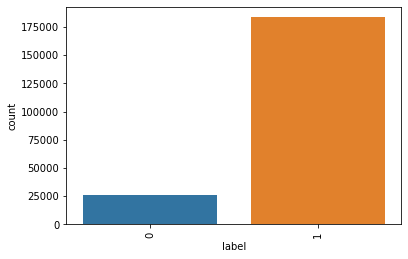

In [13]:
plt.figure()
count1=sns.countplot(df['label'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

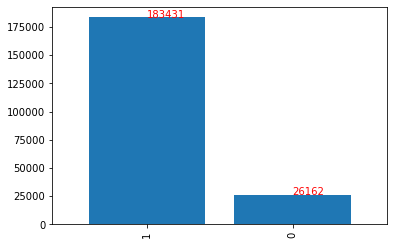

In [14]:
s = df['label'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.label + 0.2 , v.label, color='red')

Observations:
    
    1.After glancing through above two graphs we can conclude that there is class imbalance.



    
    

2.AON

Introduction:
    
    1.Age on cellular network in days

In [15]:
df['aon'].describe()

count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

Observations:
    
    1.The 75th percentile is 982 and maximum value is 999860 this clearly indicates that there are enough outliers.

<AxesSubplot:xlabel='aon', ylabel='Density'>

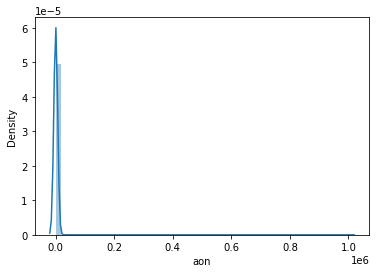

In [203]:
sns.distplot(df['aon'])

Observations:
    
    1.We can observe that there is some sort of skewness.

<AxesSubplot:xlabel='aon'>

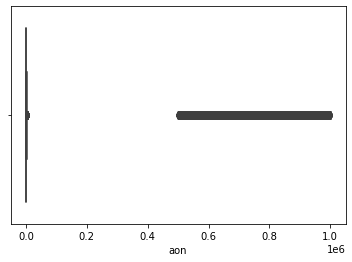

In [204]:
sns.boxplot(df['aon'])

Observations:
    
    1.There are outliers and for this column the standard scaling is so neccesary.

3.daily_decr30

Introduction:
    
    This column means that daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah).


In [18]:
df['daily_decr30'].describe()

count    209593.000000
mean       5381.402289
std        9220.623400
min         -93.012667
25%          42.440000
50%        1469.175667
75%        7244.000000
max      265926.000000
Name: daily_decr30, dtype: float64

Observations:
    
    1.The range of values is from -93 to 265926 so there is a need of scaling the values.

<Figure size 360x504 with 0 Axes>

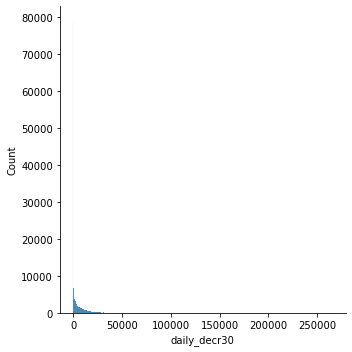

In [19]:
plt.figure(figsize=(5,7))
sns.displot(df['daily_decr30'])
plt.show()

Observations:
    
    1.We can see that most of the values lies between 0 to 7000.

<AxesSubplot:xlabel='daily_decr30'>

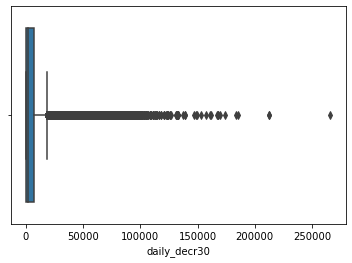

In [205]:
sns.boxplot(df['daily_decr30'])

Observations:
    
    1.We can clearly see that there are outliers in significant numbers.

4.daily_decr90

Introduction:
    
    1.Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)


In [21]:
df['daily_decr90'].describe()

count    209593.000000
mean       6082.515068
std       10918.812767
min         -93.012667
25%          42.692000
50%        1500.000000
75%        7802.790000
max      320630.000000
Name: daily_decr90, dtype: float64

Observations:
    
    1.The mean of daily amout spent from main account averaged over last 90 days  is 6082 .
    2.It requires scaling down of the values.

<Figure size 144x144 with 0 Axes>

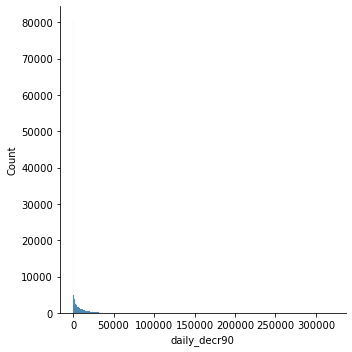

In [22]:
plt.figure(figsize=(2,2))
dpi=145
sns.displot(df['daily_decr90'])
plt.show()


Observations:
    
    1.We can see that the major values lies in 0 to 7000, and mean lies in 6082.

<AxesSubplot:xlabel='daily_decr90'>

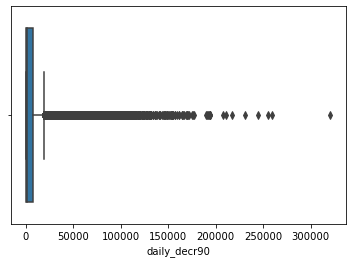

In [206]:
sns.boxplot(df['daily_decr90'])

Observations:
    
    1.There are enough outliers.

5.rental30

Introduction:
    
    This column refers as average main account balance over last 30 days.


In [24]:
df['rental30'].describe()

count    209593.000000
mean       2692.581910
std        4308.586781
min      -23737.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64

Observations:
    
    1.The mean of the following data is 2692.
    2.This column has be scaled down.

<AxesSubplot:xlabel='rental30', ylabel='Density'>

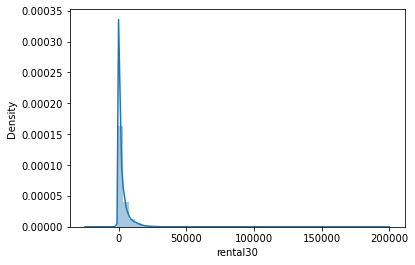

In [207]:
sns.distplot(df['rental30'])

Observations:
    
    1.From this graph we can see that upto 75th percentile the value lies below 3356.
    

In [26]:
df['rental30'].median()

1083.57

Observations:
    
    1.The most of values are around 1083.

<AxesSubplot:xlabel='rental30'>

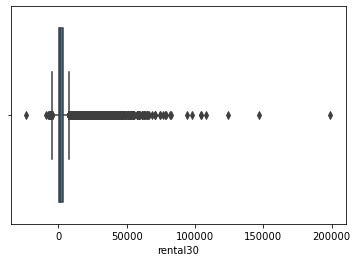

In [208]:
sns.boxplot(df['rental30'])

Observations:
    
    1.The outliers are in significant numbers.

6.rental90

Introduction:
    
    Average main account balance over last 90 days.


In [28]:
df['rental90'].describe()

count    209593.000000
mean       3483.406534
std        5770.461279
min      -24720.580000
25%         300.260000
50%        1334.000000
75%        4201.790000
max      200148.110000
Name: rental90, dtype: float64

Obseravations:
    
    1.The average main account balance over last 90 days is 3483.

<AxesSubplot:xlabel='rental90', ylabel='Density'>

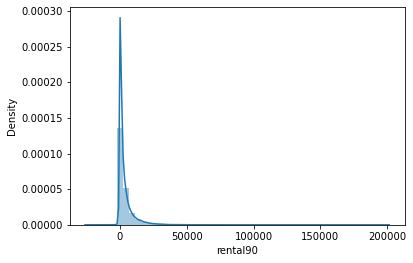

In [209]:
sns.distplot(df['rental90'])

Observations:
    
    1.Upto 75th percentile the value lies below 4201.

<AxesSubplot:xlabel='rental90'>

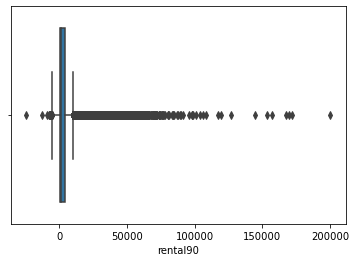

In [210]:
sns.boxplot(df['rental90'])

Observations:
    
    1.There are enough  outliers.

7.last_rech_date_ma

Introduction:
    
    Number of days till last recharge of main account.


In [31]:
df['last_rech_date_ma'].describe()

count    209593.000000
mean       3755.847800
std       53905.892230
min         -29.000000
25%           1.000000
50%           3.000000
75%           7.000000
max      998650.377733
Name: last_rech_date_ma, dtype: float64

Observations:
    
    1.There is some noise in this data,because number of days cant be negative and maximum value cant be 998650
    2.7 number of days falls under 75th percentile.

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

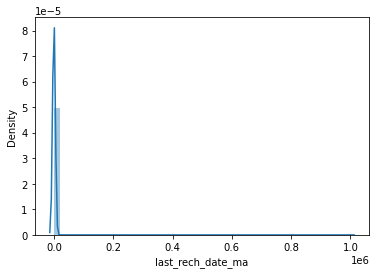

In [211]:
sns.distplot(df['last_rech_date_ma'])

Observations:
    
    1.There are too much noise in the data.

<AxesSubplot:xlabel='last_rech_date_ma'>

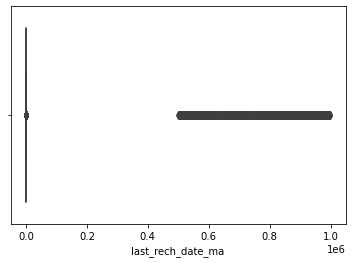

In [212]:
sns.boxplot(df['last_rech_date_ma'])

Observations:
    
    1.There are too much outliers.

8.last_rech_date_da

Introduction:
    
    Number of days till last recharge of data account.


In [34]:
df['last_rech_date_da'].describe()

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

Observations:
    
    1.There is some noise in  the data, since its number days it cant be negative,but in some users case we can see negative numbers also and moreover the number of days cant be something like 999171.8 which means the person has opened the account in apes age, and these outliers are also has to be removed.

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

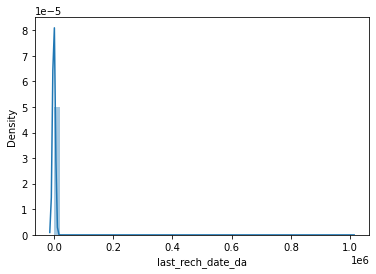

In [213]:
sns.distplot(df['last_rech_date_da'])

Observations:
    
    1.We can clearly say that there is too much noise in the data.

<AxesSubplot:xlabel='last_rech_date_da'>

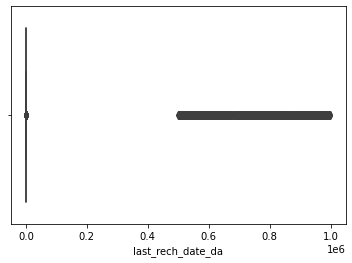

In [214]:
sns.boxplot(df['last_rech_date_da'])

Observations:
    
    1.There are outliers which has to be eliminated.

9.cnt_ma_rech30

Introductions:
    
    Number of times main account got recharged in last 30 days.


In [37]:
df['cnt_ma_rech30'].describe()

count    209593.000000
mean          3.978057
std           4.256090
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64

Observations:
    
    1.This data seems to be perfect.
    2.upto 75th percentile the values are lies below 5.

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

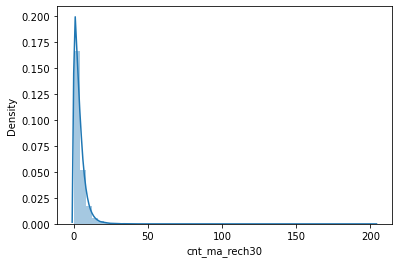

In [215]:
sns.distplot(df['cnt_ma_rech30'])

Obseravations:
    
    1.Most of the data lies below value 5.

<AxesSubplot:xlabel='cnt_ma_rech30'>

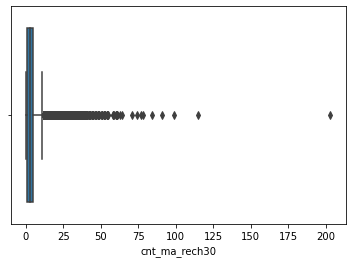

In [216]:
sns.boxplot(df['cnt_ma_rech30'])

Observations:
    
    1.There are outliers in the data.

10.fr_ma_rech30

Introduction:
    
    Frequency of main account recharged in last 30 days #Unsure of the defination.


In [40]:
df['fr_ma_rech30'].describe()

count    209593.000000
mean       3737.355121
std       53643.625172
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max      999606.368132
Name: fr_ma_rech30, dtype: float64

Observations:
    
    1.Minimum value is 0 which is fine, but the maximum value is 999606 which means daily that person has to recharge 999606/30=33320 times means 33320/1440=23 times, finally our defination is that that person has to recharge 23 time for a minute whic clearly indicates that there is some noise in the data.

<AxesSubplot:xlabel='fr_ma_rech30', ylabel='Density'>

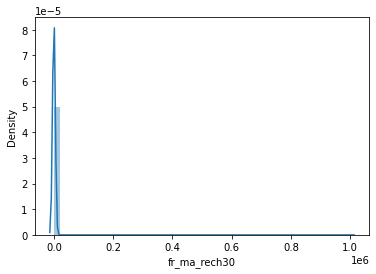

In [217]:
sns.distplot(df['fr_ma_rech30'])

Observations:
    
    1.There is some noise in the data.

<AxesSubplot:xlabel='fr_ma_rech30'>

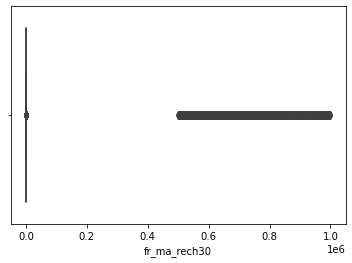

In [218]:
sns.boxplot(df['fr_ma_rech30'])

Observations:
    
     1.The presence of outliers are clearly visible.

11.sumamnt_ma_rech30

Introduction:
    
    Total amount of recharge in main account over last 30 days (in Indonesian Rupiah).

In [43]:
df['sumamnt_ma_rech30'].describe()

count    209593.000000
mean       7704.501157
std       10139.621714
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64

Observations:
    
    1.There is a large difference in 75th percentile and max value indicating that there are outliers.

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

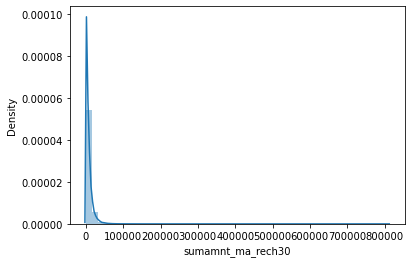

In [219]:
sns.distplot(df['sumamnt_ma_rech30'])

Observations:
    
    1.Most of the values lies under 10000.
    2.There some noise in the data which created a distortions.

<AxesSubplot:xlabel='sumamnt_ma_rech30'>

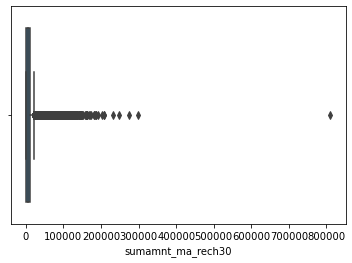

In [220]:
sns.boxplot(df['sumamnt_ma_rech30'])

Observations:
    
    1.There are outliers.

12.medianamnt_ma_rech30

Introduction:
    
    Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah).



In [46]:
df['medianamnt_ma_rech30'].describe()

count    209593.000000
mean       1812.817952
std        2070.864620
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech30, dtype: float64

Observations:
    
    1.Most of the medians of the amount is 1812.

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

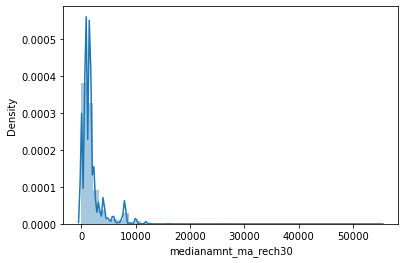

In [221]:
sns.distplot(df['medianamnt_ma_rech30'])

Obseravations:
    
    1.Most of the value is under 1924

<AxesSubplot:xlabel='medianamnt_ma_rech30'>

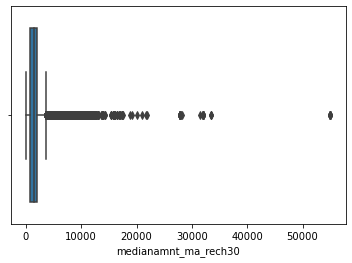

In [222]:
sns.boxplot(df['medianamnt_ma_rech30'])

Observations:
    
    1.Outliers are clearly visible.

13.medianmarechprebal30

Introduction:
    
    Median of main account balance just before recharge in last 30 days at user level (in Indonasian Rupiah),we can understand like this aslo in most of the times main account balance just before recharge in last 30 days at user level (in Indonasian Rupiah).


In [49]:
df['medianmarechprebal30'].describe()

count    209593.000000
mean       3851.927942
std       54006.374433
min        -200.000000
25%          11.000000
50%          33.900000
75%          83.000000
max      999479.419319
Name: medianmarechprebal30, dtype: float64

Obseravations:
    
    1.Most of the people(75 percentile)used to keep a account balance of below 80 rupees before new recharge.

<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

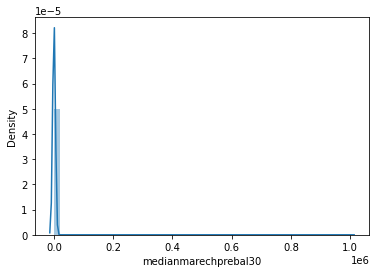

In [223]:
sns.distplot(df['medianmarechprebal30'])

Observations:
    
    1.Majority of the user have their account balance lower than 80 and there are exception cases even.

<AxesSubplot:xlabel='medianmarechprebal30'>

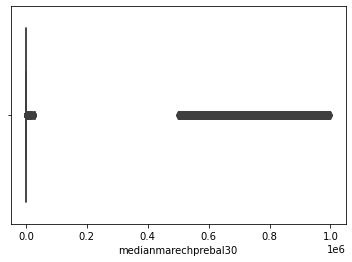

In [224]:
sns.boxplot(df['medianmarechprebal30'])

Observations:
    
    1.There are enough outliers,

14.cnt_ma_rech90

Introduction:
    
    Number of times main account got recharged in last 90 days.


In [52]:
df['cnt_ma_rech90'].describe()

count    209593.00000
mean          6.31543
std           7.19347
min           0.00000
25%           2.00000
50%           4.00000
75%           8.00000
max         336.00000
Name: cnt_ma_rech90, dtype: float64

Observations:
    
    1.The mean clearly tells that user have an habbit of recharging their main account 6 times in 3 months, 

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

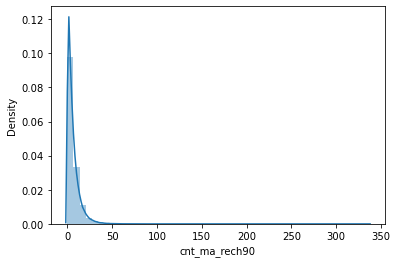

In [225]:
sns.distplot(df['cnt_ma_rech90'])

Observations:
    
    1.Most of the values are under 8 times in 90 days and there are exception cases where people recharge more than 100 time in 90 days.

<AxesSubplot:xlabel='cnt_ma_rech90'>

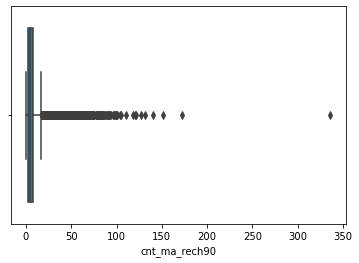

In [226]:
sns.boxplot(df['cnt_ma_rech90'])

Observations:
    
    1.There are outliers.

15.fr_ma_rech90

Introduction:
    
    Frequency of main account recharged in last 90 days.


comment:
    
    Since its same as previous column no need further analysis.

16.sumamnt_ma_rech90

Introduction:
    
    Total amount of recharge in main account over last 90 days (in Indonasian Rupiah).


In [55]:
df['sumamnt_ma_rech90'].describe()

count    209593.000000
mean      12396.218352
std       16857.793882
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64

Observations:
    
    1.The mean value is 12396
    2.75th percentile of people kept their total amout of main account in last 90 is 16000.

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

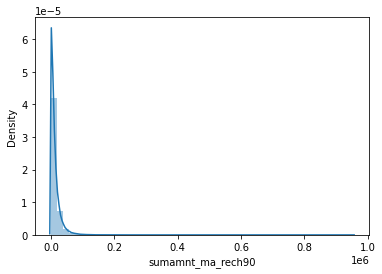

In [227]:
sns.distplot(df['sumamnt_ma_rech90'])

Observations:
    
    1.Even though the majority of people keep it less than 16k but there are exceptions even.

<AxesSubplot:xlabel='sumamnt_ma_rech90'>

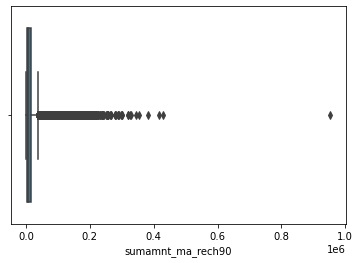

In [228]:
sns.boxplot(df['sumamnt_ma_rech90'])

Observations:
    
    1.There are outliers.

17.medianamnt_ma_rech90

Introduction:
    
    Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah).


In [58]:
df['medianamnt_ma_rech90'].describe()

count    209593.000000
mean       1864.595821
std        2081.680664
min           0.000000
25%         773.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech90, dtype: float64

Observations:
    
    1.75th percentile of the user keep this amount under 1925
    2.There is large difference between 75th percentile and maximum value so outliers are there.

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

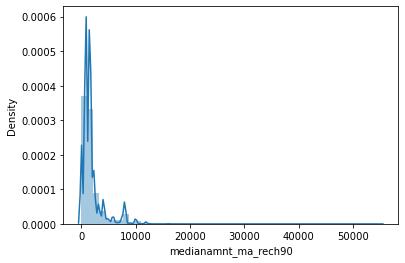

In [229]:
sns.distplot(df['medianamnt_ma_rech90'])

Observations:
    
    1.Upto a amout of 10000 the graph is significant after that the values become insignificant.

<AxesSubplot:xlabel='medianamnt_ma_rech90'>

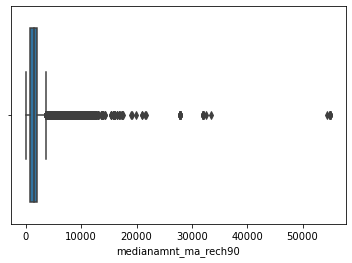

In [230]:
sns.boxplot(df['medianamnt_ma_rech90'])

Observations:
    
    1.There are outliers.

18.medianmarechprebal90

Introduction:
    
    Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah).


In [61]:
df['medianmarechprebal90'].describe()

count    209593.000000
mean         92.025541
std         369.215658
min        -200.000000
25%          14.600000
50%          36.000000
75%          79.310000
max       41456.500000
Name: medianmarechprebal90, dtype: float64

Observations:
    
    1.Most of the user(75 percentile) keep their main account balance just before recharge in last 90 days is below 80.
    2.There is large gap between the 75th percentile and maximum value hence there could be high probability of outliers.

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

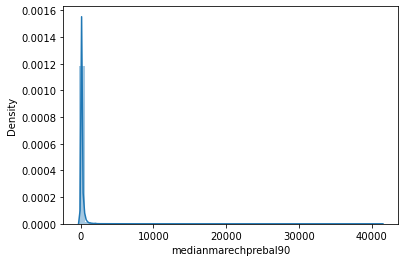

In [231]:
sns.distplot(df['medianmarechprebal90'])

Observations:
    
    1.As like the other graphs most of the values belongs in minimum range and there are some exceptions upto 40000.

<AxesSubplot:xlabel='medianmarechprebal90'>

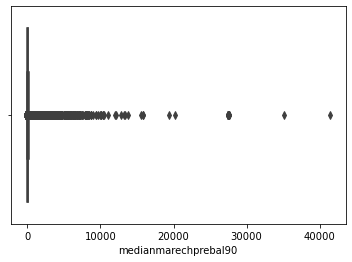

In [232]:
sns.boxplot(df['medianmarechprebal90'])

Observations:
    
    1.There are outliers.

19.cnt_da_rech30

Introduction:
    
    Number of times data account got recharged in last 30 days.


In [64]:
df['cnt_da_rech30'].describe()

count    209593.000000
mean        262.578110
std        4183.897978
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99914.441420
Name: cnt_da_rech30, dtype: float64

Observations:
    
    1.In 75th percentile user case its 0 but there are few exceptions.

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

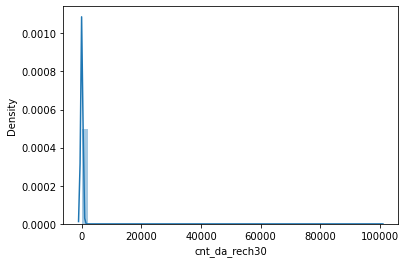

In [233]:
sns.distplot(df['cnt_da_rech30'])

Observations:
    
    1.We can clearly see that most of the cases its 0 but there are exceptions.

<AxesSubplot:xlabel='cnt_da_rech30'>

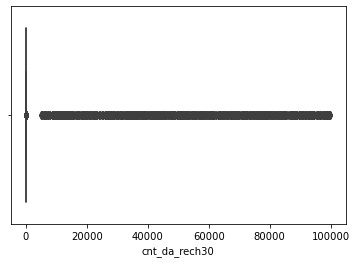

In [234]:
sns.boxplot(df['cnt_da_rech30'])

Observations:
    
    1.There are outliers.

20.fr_da_rech30

Introduction:
    
    Frequency of data account recharged in last 30 days.


In [67]:
df['fr_da_rech30'].describe()

count    209593.000000
mean       3749.494447
std       53885.414979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999809.240107
Name: fr_da_rech30, dtype: float64

Observations:
    
    1.If we see clearly upto 75th percentile the value is 0 and suddenly the value rised to 999809 ,since this is the frequency of data recharged in 30 days such a huge value not possible so its a noise in the dataset.

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

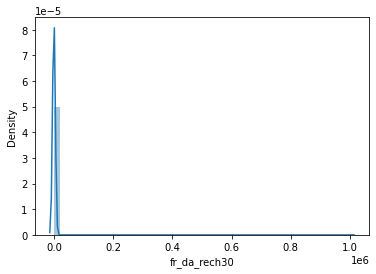

In [235]:
sns.distplot(df['fr_da_rech30'])

Observations:
    
    1.The presence of noise data is clearly visible by seeing the X axis.

<AxesSubplot:xlabel='fr_da_rech30'>

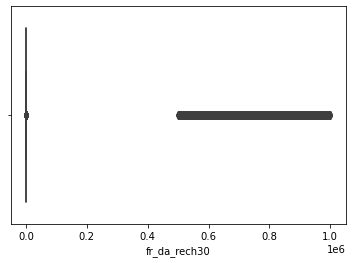

In [236]:
sns.boxplot(df['fr_da_rech30'])

Observations:
    
    1.There are enough outliers to clean.

21.cnt_da_rech90

Introduction:
    
    Number of times data account got recharged in last 90 days.


In [70]:
df['cnt_da_rech90'].describe()

count    209593.000000
mean          0.041495
std           0.397556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64

Observations:
    
    1.75th percentile of user wont recharge in last 90 days,there are users in countable who reacharge data.

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

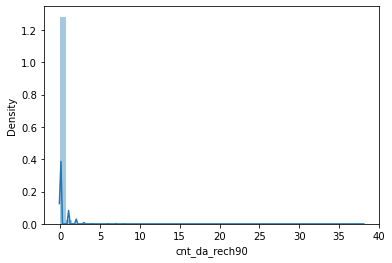

In [237]:
sns.distplot(df['cnt_da_rech90'])

Obseravations:
    
    1.The distplot clearly tells that most of user wont recharge data.

<AxesSubplot:xlabel='cnt_da_rech90'>

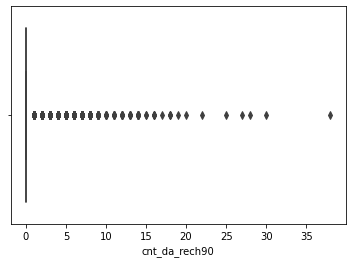

In [238]:
sns.boxplot(df['cnt_da_rech90'])

Observations:
    
    1.Clearly there are outliers.

22.fr_da_rech90

Introduction:

    Frequency of data account recharged in last 90 days



In [73]:
df['fr_da_rech90'].describe()

count    209593.000000
mean          0.045712
std           0.951386
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: fr_da_rech90, dtype: float64

Observations:
    
    1.It clearly shows that most of the user wont recharge.

<AxesSubplot:xlabel='fr_da_rech90', ylabel='Density'>

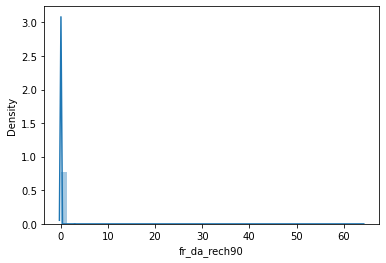

In [239]:
sns.distplot(df['fr_da_rech90'])

Observations:
    
    1.It shows that most of the values are 0

<AxesSubplot:xlabel='fr_da_rech90'>

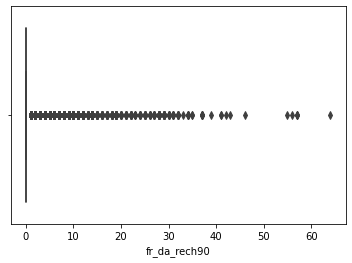

In [240]:
sns.boxplot(df['fr_da_rech90'])

Observations:
    
    1.There are outliers in the data.

23.cnt_loans30

Introduction:
    
    Number of loans taken by user in last 30 days.

    
    

In [76]:
df['cnt_loans30'].describe()

count    209593.000000
mean          2.758981
std           2.554502
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          50.000000
Name: cnt_loans30, dtype: float64

Observations:
    
    1.Most of the people took loan about 4 or less times in a month.

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

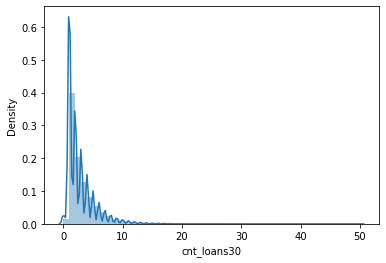

In [241]:
sns.distplot(df['cnt_loans30'])

Observations:
    
    1.We can observe that upto an value of 10 there is a significant graph, but most of the user lies in 4 or less times.

<AxesSubplot:xlabel='cnt_loans30'>

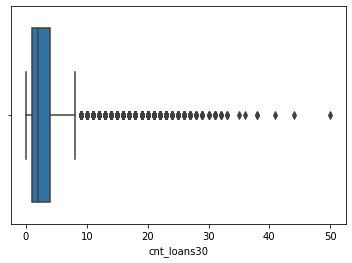

In [242]:
sns.boxplot(df['cnt_loans30'])

Observations:
    
    1.Outliers are clearly distinguishable.

24.cnt_loans90

Introductions:
    
    1.It depicts how many number of times the user took loan in last 90 days.

In [79]:
df['cnt_loans90'].describe()

count    209593.000000
mean         18.520919
std         224.797423
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        4997.517944
Name: cnt_loans90, dtype: float64

Observations:
    
    1.Most of the user took loan 5 times or less than that in 3 months.

<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

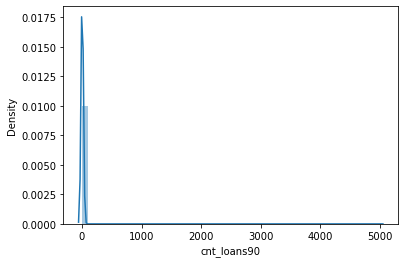

In [243]:
sns.distplot(df['cnt_loans90'])

Observations:
    
    1.we can see the significant graph in the range from 1 to 5.

<AxesSubplot:xlabel='cnt_loans90'>

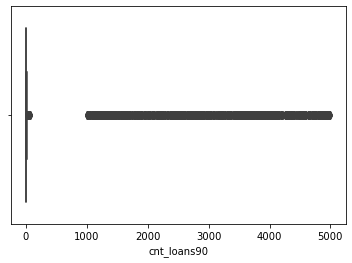

In [244]:
sns.boxplot(df['cnt_loans90'])

Observations:
    
    1.There are outliers.

Comment:
    
    1.amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90' no need to analyse them separately because they behave in the same way as for 30 days of period.

25.Payback30

Introduction:
    
    Average payback time in days over last 30 days.


In [82]:
df['payback30'].describe()

count    209593.000000
mean          3.398826
std           8.813729
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max         171.500000
Name: payback30, dtype: float64

Observations:
    
    1.Most of the payback in 30 days is about 3-4 times

<AxesSubplot:xlabel='payback30', ylabel='Density'>

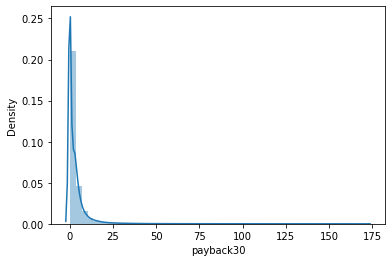

In [245]:
sns.distplot(df['payback30'])

<AxesSubplot:xlabel='payback30'>

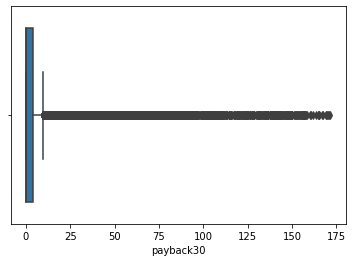

In [246]:
sns.boxplot(df['payback30'])

Observations:
    
    1.There are outliers

Major conclusions over Univariate Analysis:
    
    1.Most of the column has outliers
    2.There are some noise in the data like days to be -24 or to be 9lakh+ which has to be cleaned.
    3.There are columns like which shows the data of 30 days and 90 days over the same content, out of two one can be removed because both behaves in similar manner.
    

After univariate analysis i am supposed to do bi variate analysis but i will prefer multivariate analysis because after completing the multivariate analysis we will get to know better about different variables and how those are interrelated to each other

# Multivariate Analysis

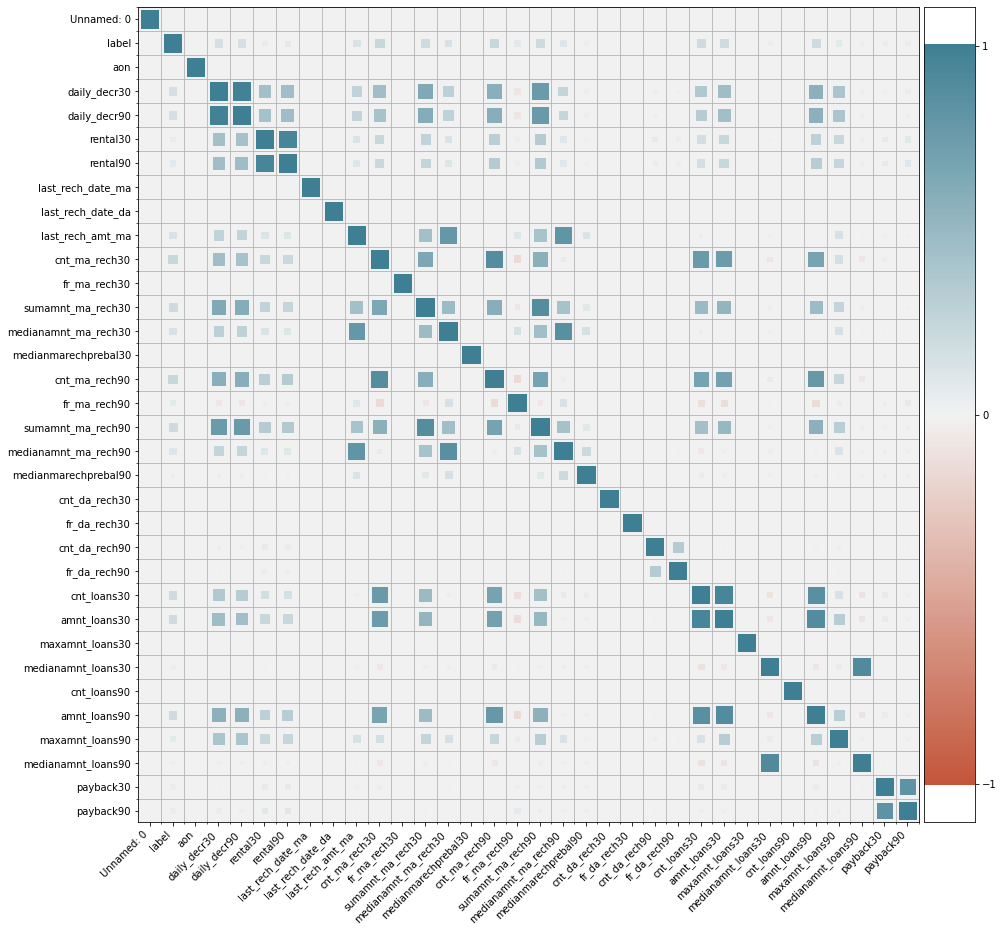

In [247]:
from heatmap import heatmap,corrplot
plt.figure(figsize=(15,15))
corrplot(df.corr(),size_scale=300)

Observations:
    
    1.There are some columns which has no correlation with any other columns which are need to be removed.
        1.Unnamed 0
        2.aon
        3.last_date_rech_ma
        4.last_date_rech_da
        5.fr_ma_rech30
        6.medianmarechprebal30
        7.cnt_da_rech30
        8.fr_da_rech30
        9.cnt_da_rech90
        10.fr_da_rech90
        11.maxamnt_loans30
        12.medianamnt_loans30
        13.cnt_loans90
        14.medianamnt_loans90
        15.payback30
        
    2.There are some columns of 30 days and 90 days of same content, if we look at them they behave similar fashion with other variables,so lets remove 30 days column
        1.daily_decr30
        2.rental30
        3.sumamnt_ma_rech30
        4.medianamnt_ma_rech30
        5.cnt_loans30
        6.amnt_loans30,

In [86]:
df1_new=df.drop(['Unnamed: 0','aon','cnt_ma_rech30','medianmarechprebal90','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','maxamnt_loans30','medianamnt_loans30','cnt_loans90','medianamnt_loans90','payback30','daily_decr30','rental30','sumamnt_ma_rech30','medianamnt_ma_rech30','amnt_loans30'],axis=1)

In [87]:
df1_new.head()

,label,msisdn,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90,pcircle,pdate
0,0,21408I70789,3065.150000,260.13,1539,2,21,3078,1539.0,2,12,6,29.000000,UPW,2016-07-20
1,1,76462I70374,12124.750000,3691.26,5787,1,0,5787,5787.0,1,12,12,0.000000,UPW,2016-08-10
2,1,17943I70372,1398.000000,900.13,1539,1,0,1539,1539.0,1,6,6,0.000000,UPW,2016-08-19
3,1,55773I70781,21.228000,159.42,947,1,0,947,947.0,2,12,6,0.000000,UPW,2016-06-06
4,1,03813I82730,150.619333,1098.90,2309,8,2,23496,2888.0,7,42,6,2.333333,UPW,2016-06-22


In [88]:
df1_new.shape

(209593, 15)

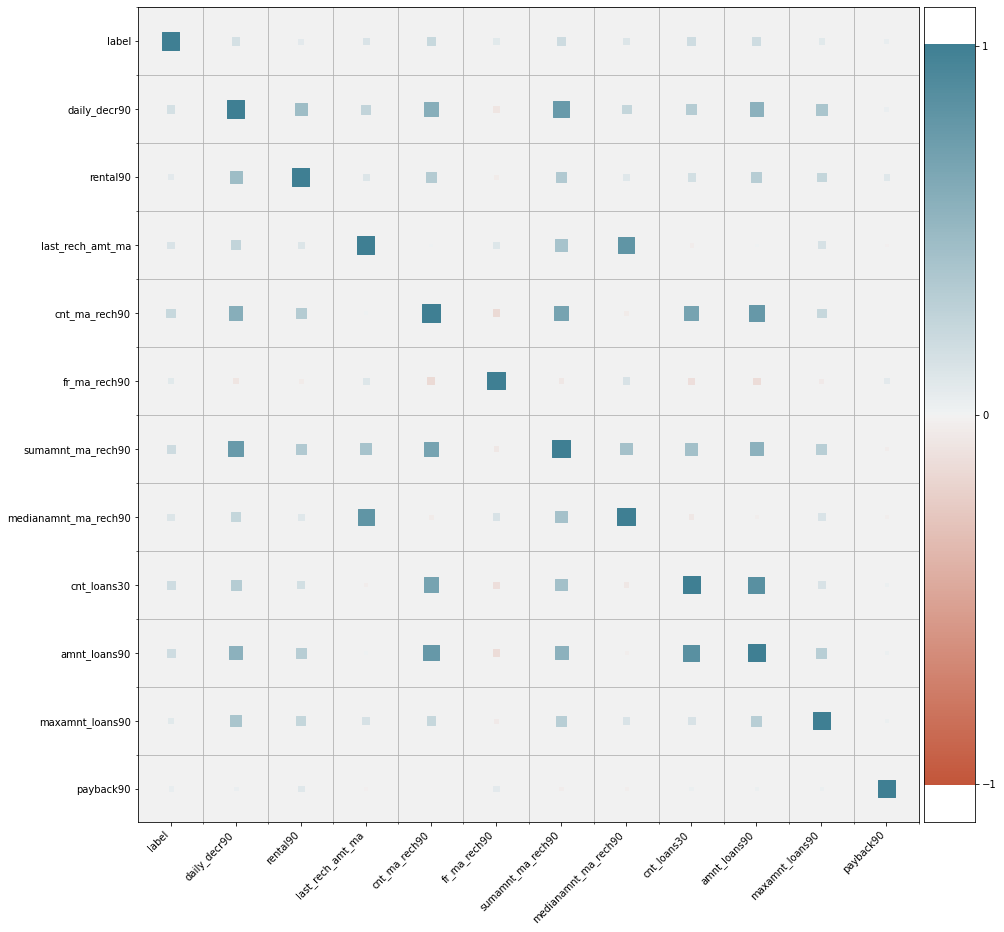

In [248]:
#lets check the correlations now again
from heatmap import heatmap,corrplot
plt.figure(figsize=(15,15))
corrplot(df1_new.corr(),size_scale=300)

Observations:
    
    1.Now we can see each variable has a significant correlation with the other variables.

In [90]:
#Checking for correlation values through heatmap

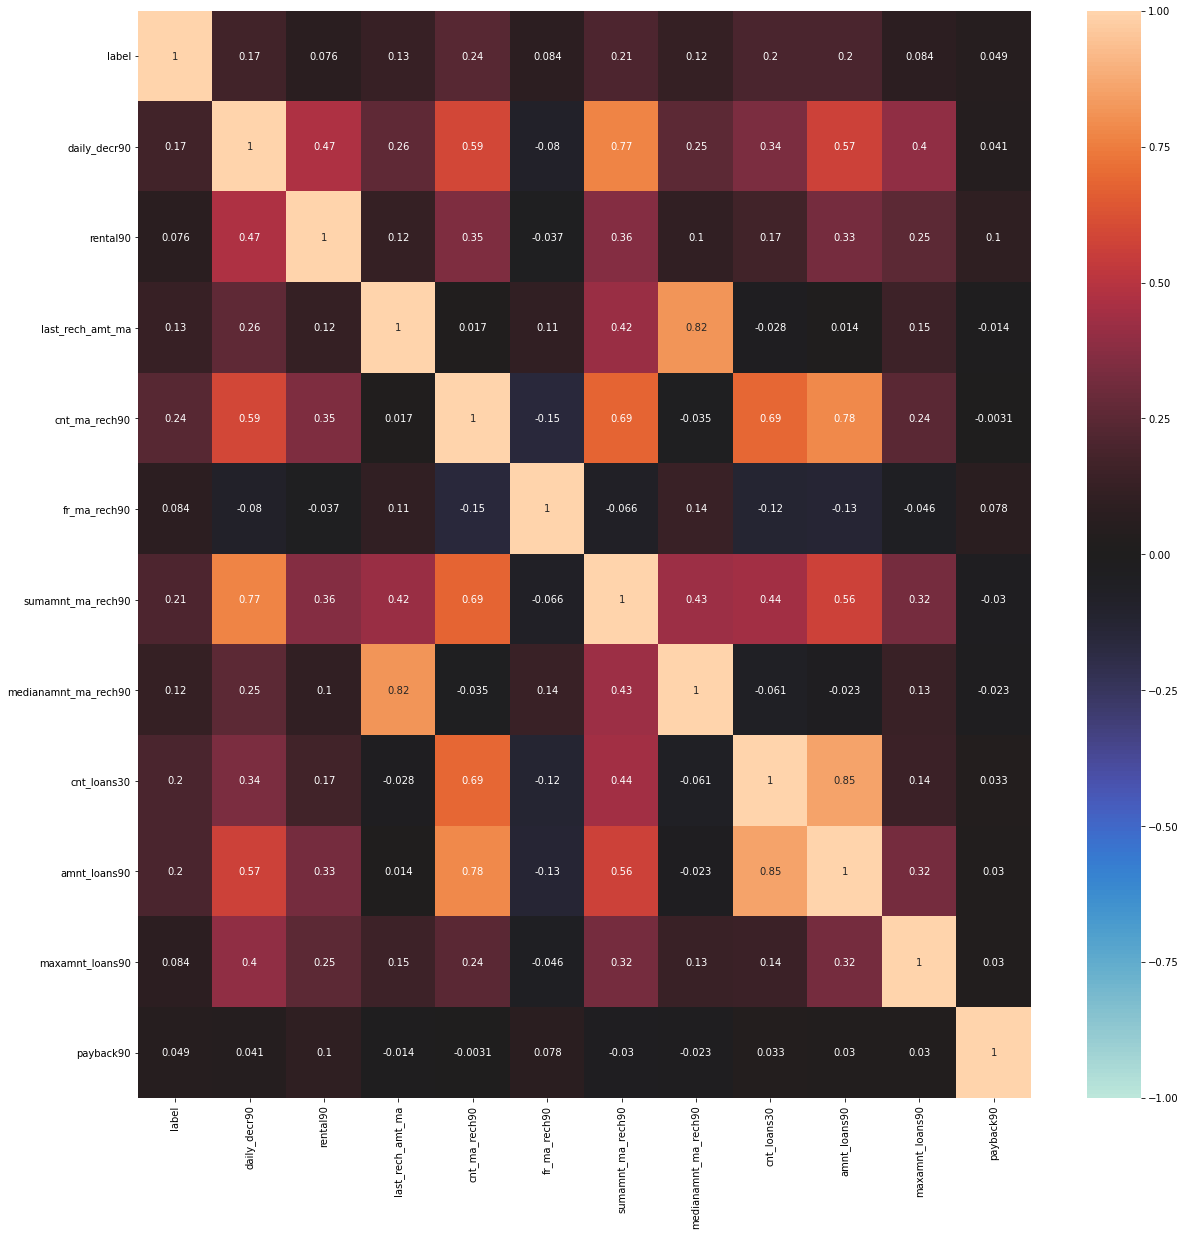

In [249]:
plt.figure(figsize=(20,20))
sns.heatmap(df1_new.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    1.Lets check the our target variable correlation with other variables in significant numbers.
        1.daily_decr90
        2.cnt_ma_rech30
        3.sumamnt_ma_rech90
        4.amnt_loans90
        
    2.There are some significant relationships between following variables and it has to be examinated in bi variate analysis and conclusions has to be drawn.
        1.last_rech_amt_ma vs  daily_decr90
        2.cnt_ma_rech90 vs  daily_decr90
        3.cnt_ma_rech90 vs rental90
        4.sumamnt_ma_rech90 vs [label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90]
        5.medianamnt_ma_rech90 vs [last_rech_amt_ma,sumamnt_ma_rech90]
        6.cnt_loans30 vs [daily_decr90,cnt_ma_rech90,sumamnt_ma_rech90]
        7.amnt_loans90 vs [daily_decr90,rental90,cnt_ma_rech90,sumamnt_ma_rech90,cnt_loans30]
        8.maxamnt_loans90 vs amnt_loans90
        9.payback90 vs rental90

In [92]:
#Lets carry out multi variate analysis by grouping

In [93]:
g=df1_new.groupby('label')

In [94]:
#lets p represents label 1 which means who paid the loan taken
p=g.get_group(1)

In [95]:
p.head()

,label,msisdn,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90,pcircle,pdate
1,1,76462I70374,12124.750000,3691.26,5787,1,0,5787,5787.0,1,12,12,0.000000,UPW,2016-08-10
2,1,17943I70372,1398.000000,900.13,1539,1,0,1539,1539.0,1,6,6,0.000000,UPW,2016-08-19
3,1,55773I70781,21.228000,159.42,947,1,0,947,947.0,2,12,6,0.000000,UPW,2016-06-06
4,1,03813I82730,150.619333,1098.90,2309,8,2,23496,2888.0,7,42,6,2.333333,UPW,2016-06-22
5,1,35819I70783,2261.460000,380.13,1539,8,0,11744,1539.0,3,18,6,8.333333,UPW,2016-07-02


In [96]:
#lets q represents label 0 means who didnt payback loans
q=g.get_group(0)

In [97]:
q.head()

,label,msisdn,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90,pcircle,pdate
0,0,21408I70789,3065.150000,260.13,1539,2,21,3078,1539.0,2,12,6,29.0,UPW,2016-07-20
11,0,82417I90848,65.166667,326.20,7526,2,0,9065,4532.5,1,6,6,0.0,UPW,2016-06-20
15,0,24075I89239,12.000000,1216.80,0,0,0,0,0.0,1,6,6,0.0,UPW,2016-06-24
16,0,82053I85350,1000.000000,1087.88,0,0,0,0,0.0,1,6,6,0.0,UPW,2016-07-04
21,0,75522I70784,515.200000,58.20,773,2,64,1546,773.0,2,12,6,0.0,UPW,2016-07-01


In [98]:
#lets compare both the catagories

In [99]:
p.describe()

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
count,183431.0,183431.000000,183431.000000,183431.000000,183431.000000,183431.000000,183431.000000,183431.000000,183431.000000,183431.000000,183431.000000,183431.000000
mean,1.0,6767.646423,3647.985363,2182.462408,6.957630,8.118012,13706.395778,1959.607547,2.948340,25.642590,6.769990,4.512952
std,0.0,11446.417423,5926.903342,2386.379103,7.397362,12.645785,17473.844265,2079.656203,2.645055,27.516137,2.197498,10.118775
min,1.0,-93.012667,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,56.348500,357.710000,770.000000,2.000000,0.000000,3252.000000,773.000000,1.000000,6.000000,6.000000,0.000000
50%,1.0,2190.950000,1443.330000,1539.000000,5.000000,3.000000,8473.000000,1539.000000,2.000000,18.000000,6.000000,2.040000
75%,1.0,9037.790000,4418.190000,2309.000000,9.000000,9.000000,17593.500000,1928.000000,4.000000,30.000000,6.000000,4.800000
max,1.0,320630.000000,200148.110000,55000.000000,336.000000,88.000000,953036.000000,55000.000000,50.000000,438.000000,12.000000,171.500000


In [100]:
q.describe()

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
count,26162.0,26162.000000,26162.000000,26162.00000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000
mean,0.0,1278.817736,2329.486376,1237.04583,1.812744,4.903601,3210.102783,1198.435135,1.431313,9.642382,6.234386,2.979047
std,0.0,3181.302208,4352.824562,2078.08958,2.778879,11.817407,6283.083435,1971.178914,1.100109,8.976451,1.162510,11.459450
min,0.0,-18.378000,-6422.260000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000
25%,0.0,0.566667,78.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000
50%,0.0,35.195000,659.940000,770.00000,1.000000,0.000000,1539.000000,773.000000,1.000000,6.000000,6.000000,0.000000
75%,0.0,1125.887500,2619.697500,1539.00000,2.000000,2.000000,3851.000000,1539.000000,1.000000,12.000000,6.000000,0.000000
max,0.0,103884.610000,91595.720000,55000.00000,51.000000,87.000000,175676.000000,55000.000000,26.000000,156.000000,12.000000,158.000000


In [101]:
xp=['daily_decr90','rental90','last_rech_amt_ma','sumamnt_ma_rech90','medianamnt_ma_rech90']

In [102]:
yp=[6767.646423,3647.985363,2182.462408,13706.395778,1959.607547]

In [103]:
#lets carry out same operation of q and lets compare

In [104]:
xq=['daily_decr90','rental90','last_rech_amt_ma','sumamnt_ma_rech90','medianamnt_ma_rech90']
yq=[1278.817736,2329.486376,1237.04583,6283.083435,1971.178914]

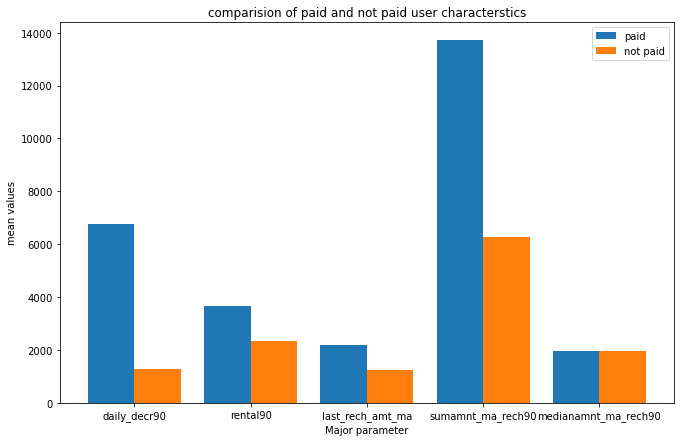

In [105]:
X =['daily_decr90','rental90','last_rech_amt_ma','sumamnt_ma_rech90','medianamnt_ma_rech90']
yp = [6767.646423,3647.985363,2182.462408,13706.395778,1959.607547]
yq = [1278.817736,2329.486376,1237.04583,6283.083435,1971.178914]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4, label = 'paid')
plt.bar(X_axis + 0.2, yq, 0.4, label = 'not paid')
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean values")
plt.title("comparision of paid and not paid user characterstics")
plt.legend()
plt.show()

Observations:
    
    1.Above is the graph shown between the paid user and not paid user we can clearly see that the user who pay back have an mean daily_decr value around 6.4k but the other category has around 1.7k.
    2.also in case of sumamnt_ma_rech90 the paid user has a mean value double the non paid user.
    3.We can see that the medianamnt_ma_rech90 gives no information regarding whether the user gonna pay or not so we can drop that.

In [106]:
df2_new=df1_new.drop('medianamnt_ma_rech90',axis=1)

In [107]:
df2_new.head()

,label,msisdn,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90,pcircle,pdate
0,0,21408I70789,3065.150000,260.13,1539,2,21,3078,2,12,6,29.000000,UPW,2016-07-20
1,1,76462I70374,12124.750000,3691.26,5787,1,0,5787,1,12,12,0.000000,UPW,2016-08-10
2,1,17943I70372,1398.000000,900.13,1539,1,0,1539,1,6,6,0.000000,UPW,2016-08-19
3,1,55773I70781,21.228000,159.42,947,1,0,947,2,12,6,0.000000,UPW,2016-06-06
4,1,03813I82730,150.619333,1098.90,2309,8,2,23496,7,42,6,2.333333,UPW,2016-06-22


# Bi Variate Analysis

In [108]:
#lets analyse the combinations which we saw at Multivariate analysis

1.Label vs daily_decr90

<Figure size 360x504 with 0 Axes>

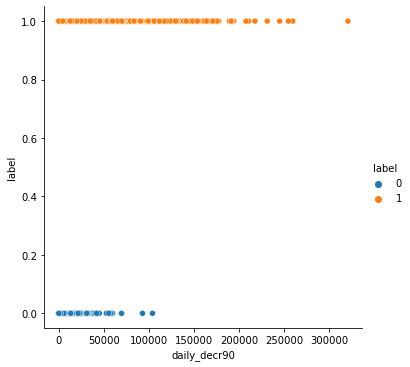

In [250]:
plt.figure(figsize=(5,7))
sns.relplot(x='daily_decr90',y='label',hue='label',data=df2_new)
plt.show()

conclusion:
    
    1.Those users who spend daily amount from main account, and have anaverage more than a lakh will always belongs to label 1.


2. Label vs cnt_ma_rech30

<Figure size 360x504 with 0 Axes>

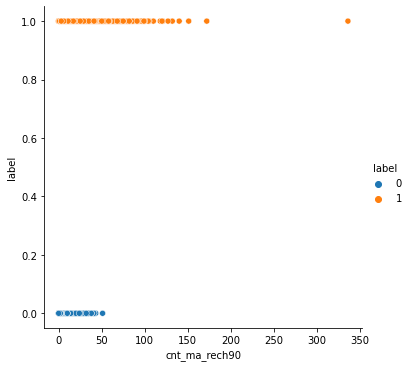

In [251]:
plt.figure(figsize=(5,7))
sns.relplot(x='cnt_ma_rech90',y='label',hue='label',data=df2_new)
plt.show()

Observations:
    
    1.Those people who have recharged their main account in last 3 months for more than 50 times always belongs to label 1.

3.Label vs amnt_loans90

<Figure size 360x504 with 0 Axes>

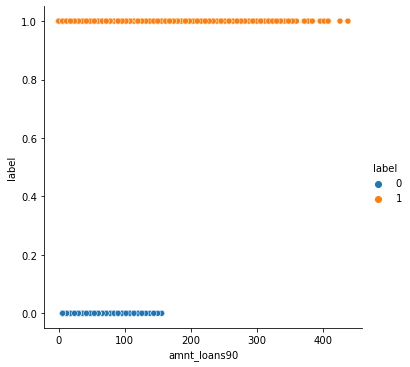

In [252]:
plt.figure(figsize=(5,7))
sns.relplot(x='amnt_loans90',y='label',hue='label',data=df2_new)
plt.show()

Observations:
    
    1.In case of total number of loans taken by user is more than 170 in 90 days then that user certainly belongs to label 1.

4.last_rech_amt_ma vs daily_decr90

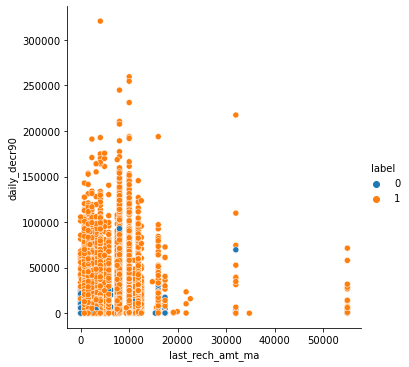

In [253]:
#px.scatter(df2_new,x='last_rech_amt_ma',y='daily_decr90',color='label',hover_data=['last_rech_amt_ma'])
sns.relplot(x='last_rech_amt_ma',y='daily_decr90',hue='label',data=df2_new)


Observations:
    
    1.In this plot we can observe tha most of the user who wont pay have an last recharge account to main account as 0 rupiah.

5.cnt_ma_rech90 vs  daily_decr90

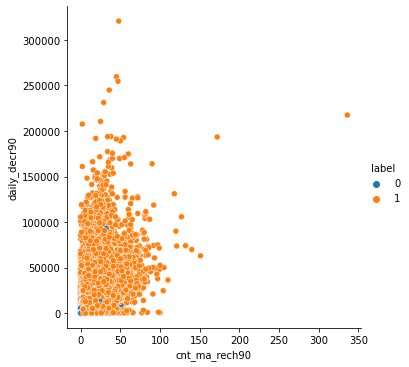

In [254]:
sns.relplot(x='cnt_ma_rech90',y='daily_decr90',hue='label',data=df2_new)

Observations:
    
    1.Most of the user who wont pay have an data of 0 times they have recharged their main account in last 90 days.

6.cnt_ma_rech90 vs rental90

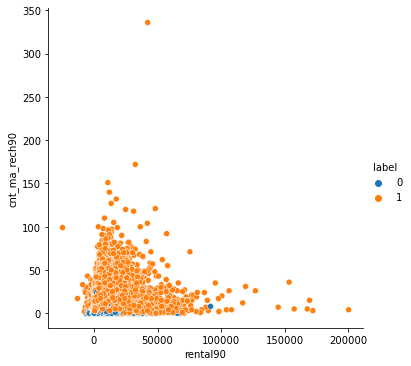

In [255]:
sns.relplot(x='rental90',y='cnt_ma_rech90',hue='label',data=df2_new)

In [115]:
#px.scatter(df2_new,x='rental90',y='cnt_ma_rech90',color='label',hover_data=['rental90'])

Observations:
    
    1.All those user who wont pay or label 0 have rental 90 less than 18.85k

7.sumamnt_ma_rech90 vs [label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90]

sumamnt_ma_rech90 vs  label


<Figure size 432x288 with 0 Axes>

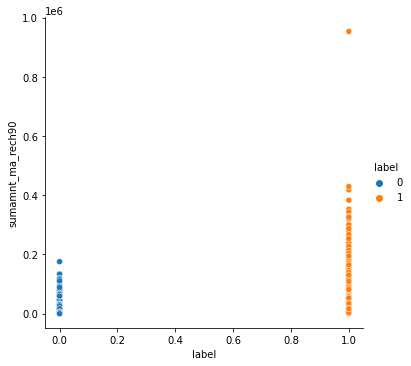



sumamnt_ma_rech90 vs  daily_decr90


<Figure size 432x288 with 0 Axes>

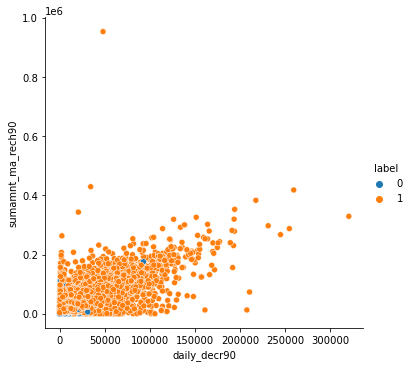



sumamnt_ma_rech90 vs  rental90


<Figure size 432x288 with 0 Axes>

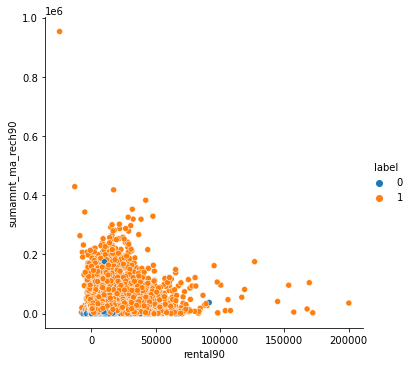



sumamnt_ma_rech90 vs  last_rech_amt_ma


<Figure size 432x288 with 0 Axes>

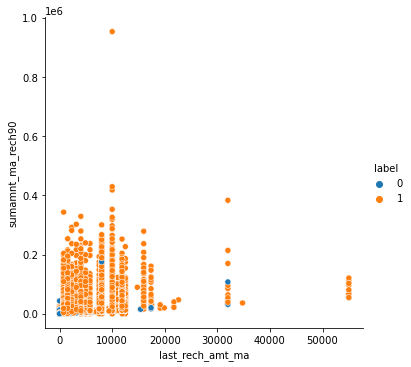



sumamnt_ma_rech90 vs  cnt_ma_rech90


<Figure size 432x288 with 0 Axes>

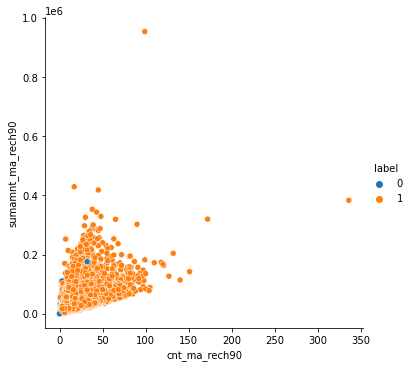

In [256]:
model=['label','daily_decr90','rental90','last_rech_amt_ma','cnt_ma_rech90']
for i in model:
    print('sumamnt_ma_rech90 vs ',i)
    plt.figure()
    sns.relplot(x=i,y='sumamnt_ma_rech90',hue='label',data=df2_new)
    plt.show()
    print('\n')
    

Observations:
    
    1.The number of times the main account got recharged in last 90 days is 0 for the user who wont pay in the most of the cases.

cnt_loans30 vs  daily_decr90


<Figure size 432x288 with 0 Axes>

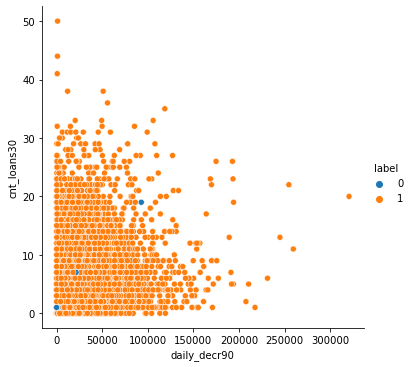



cnt_loans30 vs  cnt_ma_rech90


<Figure size 432x288 with 0 Axes>

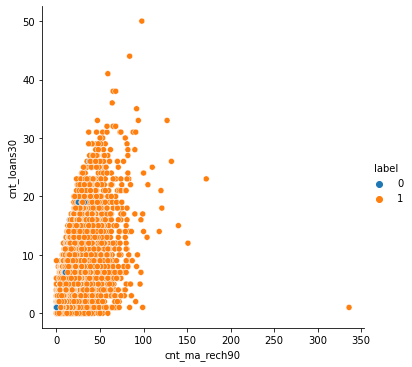



cnt_loans30 vs  sumamnt_ma_rech90


<Figure size 432x288 with 0 Axes>

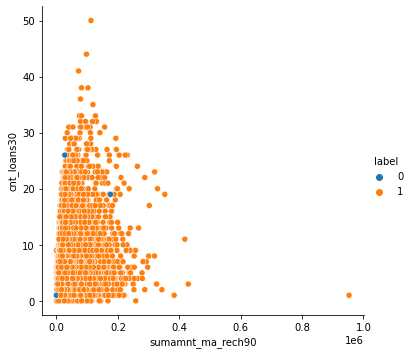

In [257]:
model=['daily_decr90','cnt_ma_rech90','sumamnt_ma_rech90']
for i in model:
    print('cnt_loans30 vs ',i)
    plt.figure()
    sns.relplot(x=i,y='cnt_loans30',hue='label',data=df2_new)
    plt.show()
    print('\n')

Observations:
    
    1.No significant effect on labels since there is so less data, same infromations which already been written are flashing.

# Data Cleanig

In [118]:
df2_new.isnull().sum()

label                0
msisdn               0
daily_decr90         0
rental90             0
last_rech_amt_ma     0
cnt_ma_rech90        0
fr_ma_rech90         0
sumamnt_ma_rech90    0
cnt_loans30          0
amnt_loans90         0
maxamnt_loans90      0
payback90            0
pcircle              0
pdate                0
dtype: int64

Observations:
    
    1.There is no null value.
    2.lets check for special characters


In [119]:
df2_new['daily_decr90'].value_counts()

0.000        4063
500.000       781
1000.000      490
700.000       343
600.000       316
             ... 
784.600         1
84.276          1
12853.830       1
1307.920        1
16839.040       1
Name: daily_decr90, Length: 158670, dtype: int64

In [120]:
for col in df2_new:
    print(col)
    print(df[col].value_counts())
    print('\n')

label
1    183431
0     26162
Name: label, dtype: int64


msisdn
04581I85330    7
47819I90840    7
67324I84453    6
55809I89238    6
30080I90588    6
              ..
28073I90586    1
01501I82737    1
91639I85349    1
75197I90589    1
02822I70780    1
Name: msisdn, Length: 186243, dtype: int64


daily_decr90
0.000        4063
500.000       781
1000.000      490
700.000       343
600.000       316
             ... 
784.600         1
84.276          1
12853.830       1
1307.920        1
16839.040       1
Name: daily_decr90, Length: 158670, dtype: int64


rental90
0.00        6918
200.13       913
99.56        767
60.00        691
90.00        685
            ... 
2973.25        1
601.86         1
13778.29       1
1477.55        1
5688.69        1
Name: rental90, Length: 141033, dtype: int64


last_rech_amt_ma
1539     56297
770      41766
0        20995
773      19523
2309     16113
         ...  
19913        1
10454        1
14783        1
4066         1
22609        1
Name: last_rech_

Observations:
    
    1.pcircle circle has nothing to do with any variable because all the data is from same circle UPW so we can take out this and date column also to make data more precise.

In [121]:
df3_new=df2_new.drop(['pcircle','pdate','msisdn'],axis=1)

In [122]:
k=df3_new.applymap(np.isreal)

In [123]:
k.head()

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [124]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

label
True    209593
Name: label, dtype: int64


daily_decr90
True    209593
Name: daily_decr90, dtype: int64


rental90
True    209593
Name: rental90, dtype: int64


last_rech_amt_ma
True    209593
Name: last_rech_amt_ma, dtype: int64


cnt_ma_rech90
True    209593
Name: cnt_ma_rech90, dtype: int64


fr_ma_rech90
True    209593
Name: fr_ma_rech90, dtype: int64


sumamnt_ma_rech90
True    209593
Name: sumamnt_ma_rech90, dtype: int64


cnt_loans30
True    209593
Name: cnt_loans30, dtype: int64


amnt_loans90
True    209593
Name: amnt_loans90, dtype: int64


maxamnt_loans90
True    209593
Name: maxamnt_loans90, dtype: int64


payback90
True    209593
Name: payback90, dtype: int64




Observations:
    
    1.We can see that there are no special data apart from numeric values in any column.

# Removing the Outliers

In [125]:
from scipy.stats import zscore

# Applying Zscore method

In [126]:
z=np.abs(zscore(df3_new))
threshold=3
dfz_new=df3_new[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df3_new.shape[0]-dfz_new.shape[0])/df3_new.shape[0])

percentage of loss of data by zscore is : 0.13323918260628934


# Applying IQR method

In [127]:
q1=df3_new.quantile(0.25)
q3=df3_new.quantile(0.75)
IQR=q3-q1
dfiq_new=df3_new[~((df3_new <(q1-1.5*IQR))|(df3_new >(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df3_new.shape[0]-dfiq_new.shape[0])/df3_new.shape[0])

percentage of loss of data by IQR is : 0.5605053603889443


Observations:
    
    1.As we can see from above two methods the data loss is more than 7%, so lets find the outliers and remove by some other methods.

# Using 3 Standard Deviation method to remove the outliers

Obsservations:
    
    1.lets see  whic and all the columns which has got more correlation with the target variables and lets remove the outliers present there using standard deviation methods.

In [128]:
#Sorting the correlation value
corr_matrix=df3_new.corr()
corr_matrix['label'].sort_values(ascending=False)

label                1.000000
cnt_ma_rech90        0.236392
sumamnt_ma_rech90    0.205793
amnt_loans90         0.199788
cnt_loans30          0.196283
daily_decr90         0.166150
last_rech_amt_ma     0.131804
fr_ma_rech90         0.084385
maxamnt_loans90      0.084144
rental90             0.075521
payback90            0.049183
Name: label, dtype: float64

Observations:
    
    1.Lets remove the outliers by considering cnt_ma_rech90 and sumamnt_ma_rech90 using standard deviations techniques.

In [129]:
upper_limit1=df3_new.cnt_ma_rech90.mean()+ 3*df3_new.cnt_ma_rech90.std()
upper_limit1

27.895840784031773

In [130]:
lower_limit1=0

In [131]:
df3_new[(df3_new.cnt_ma_rech90>upper_limit1)|(df3_new.cnt_ma_rech90<lower_limit1)]

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
130,1,52266.89,8163.82,2309,34,2,81144,10,204,12,1.888889
142,1,39567.48,5061.54,1539,30,2,47710,10,162,12,2.217391
258,1,9548.05,6662.26,770,33,0,27191,5,36,6,2.000000
274,1,12475.20,1970.40,770,34,0,26189,3,18,6,8.333333
279,1,53448.35,5826.66,3178,30,1,82238,8,48,6,4.888889
...,...,...,...,...,...,...,...,...,...,...,...
209297,1,59686.79,13617.11,1539,50,1,81875,0,6,6,1.500000
209394,1,37137.00,4153.21,7526,33,0,45646,7,96,6,2.823529
209425,1,22837.00,8453.53,770,35,0,31750,23,144,6,2.875000
209550,1,34744.57,3952.31,1539,29,3,40219,12,168,12,2.000000


Observations:
    
    1.The above is the data of user in that particular limit,lets say a recharge will come for 2 days then in 90 days it will be around 45,
    lets take out those values which are more than 60,

In [132]:
df3_new[(df3_new.cnt_ma_rech90>60)|(df3_new.cnt_ma_rech90<lower_limit1)].count()

label                200
daily_decr90         200
rental90             200
last_rech_amt_ma     200
cnt_ma_rech90        200
fr_ma_rech90         200
sumamnt_ma_rech90    200
cnt_loans30          200
amnt_loans90         200
maxamnt_loans90      200
payback90            200
dtype: int64

Observations:
    
    1.we dont want these two hundered data rows.

In [133]:
df31_new=df3_new[(df3_new.cnt_ma_rech90<60)|(df3_new.cnt_ma_rech90<lower_limit1)]
df31_new

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
0,0,3065.150000,260.13,1539,2,21,3078,2,12,6,29.000000
1,1,12124.750000,3691.26,5787,1,0,5787,1,12,12,0.000000
2,1,1398.000000,900.13,1539,1,0,1539,1,6,6,0.000000
3,1,21.228000,159.42,947,1,0,947,2,12,6,0.000000
4,1,150.619333,1098.90,2309,8,2,23496,7,42,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...
209588,1,151.872333,1089.19,4048,3,2,10404,2,12,6,1.000000
209589,1,36.936000,1728.36,773,6,2,4038,3,18,6,1.000000
209590,1,11904.350000,8893.20,1539,11,5,18592,4,54,12,3.833333
209591,1,12574.370000,984.58,773,6,4,17941,2,24,12,10.500000


In [134]:
#Lets target daily decr90

In [135]:
df31_new['daily_decr90'].describe()

count    209380.000000
mean       6031.305124
std       10750.392448
min         -93.012667
25%          42.601500
50%        1500.000000
75%        7767.172500
max      320630.000000
Name: daily_decr90, dtype: float64

Observations:
    
    1.The meaning of the column is daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    2.lets take up those values which make upto 75th percentile.


In [136]:
df31_new[(df31_new.daily_decr90>100000)|(df31_new.daily_decr90<0)]

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
74,0,-2.166667,135.72,0,0,0,0,1,6,6,0.0
78,0,-0.250000,0.00,0,0,0,0,1,6,6,0.0
96,0,-0.900000,140.94,0,0,0,0,1,6,6,0.0
109,0,-0.400000,0.00,0,0,0,0,1,6,6,0.0
273,0,-0.481667,1153.11,0,0,0,0,1,6,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
209223,1,-0.825000,45.00,7526,1,0,7526,1,6,6,0.0
209255,0,-5.000000,12208.50,0,0,0,0,1,6,6,0.0
209287,0,-0.180000,1127.52,0,0,0,0,1,6,6,0.0
209426,0,-0.331333,426.16,0,0,0,0,1,6,6,0.0


Observations:
    
    1.Lets remove these rows.

In [137]:
df32_new=df31_new[(df31_new.daily_decr90<100000)&(df31_new.daily_decr90>0)]

In [138]:
df32_new.shape

(203299, 11)

In [139]:
#Lets target rental 90 column

In [140]:
df32_new['rental90'].describe()

count    203299.000000
mean       3522.415829
std        5757.679549
min      -12912.400000
25%         322.290000
50%        1377.500000
75%        4271.925000
max      200148.110000
Name: rental90, dtype: float64

Observations:
    
    1.Average main account balance over last 90 days.
    2.lets remove those negative values.


In [141]:
df32_new[(df32_new.rental90<0)&(df32_new.label==1)]# lets not loose data of label 0 because already there is class imbalce

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
41,1,113.750000,-110.75,4048,2,9,12048,2,12,6,12.000000
77,1,1238.740000,-919.80,3178,1,0,3178,1,6,6,0.000000
116,1,63.720000,-177.48,0,0,0,0,2,12,6,0.000000
117,1,23.833333,-40.20,1547,2,34,2494,2,12,6,5.000000
125,1,166.796667,-44.88,2309,10,0,25989,4,24,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...
209304,1,176.045333,-281.12,10000,2,4,17526,3,18,6,2.000000
209332,1,5194.680000,-505.80,8000,5,3,27078,1,24,6,2.000000
209441,1,444.209333,-691.90,8000,8,3,49088,1,6,6,0.000000
209466,1,2622.100000,-441.57,1539,5,47,7703,3,24,12,6.000000


In [142]:
df33_new=df32_new[(df32_new.rental90>-8)]# lets not loose data of label 0 because already there is class imbalce

In [143]:
df33_new.shape

(197546, 11)

In [144]:
df32_new.shape

(203299, 11)

In [145]:
df.shape

(209593, 37)

In [146]:
df33_new['amnt_loans90'].describe()

count    197546.000000
mean         24.218896
std          26.124611
min           0.000000
25%           6.000000
50%          12.000000
75%          30.000000
max         438.000000
Name: amnt_loans90, dtype: float64

Observations:
    
    1.This column implies that total amount of loans taken by user in last 90 days.
    2.This seems ok.


In [147]:
for col in df32_new:
    print(col)
    print(df32_new[col].describe())
    print('\n')

label
count    203299.000000
mean          0.896743
std           0.304295
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64


daily_decr90
count    203299.000000
mean       6097.035112
std       10167.753171
min           0.000667
25%          50.544000
50%        1682.930000
75%        8039.015000
max       99893.000000
Name: daily_decr90, dtype: float64


rental90
count    203299.000000
mean       3522.415829
std        5757.679549
min      -12912.400000
25%         322.290000
50%        1377.500000
75%        4271.925000
max      200148.110000
Name: rental90, dtype: float64


last_rech_amt_ma
count    203299.000000
mean       2112.092804
std        2370.408668
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64


cnt_ma_rech90
count    203299.000000
mean          6.403243
std           6.78

In [148]:
df33_new.shape

(197546, 11)

In [149]:
print('The data loss till now is ',(df.shape[0]-df33_new.shape[0])/df.shape[0])

The data loss till now is  0.05747806463002104


Observations:
    
    1.The data loss is 5.7% which is under acceptable range
    2.Here lets stop outlier removal.

In [150]:
df33_new.head()

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
0,0,3065.150000,260.13,1539,2,21,3078,2,12,6,29.000000
1,1,12124.750000,3691.26,5787,1,0,5787,1,12,12,0.000000
2,1,1398.000000,900.13,1539,1,0,1539,1,6,6,0.000000
3,1,21.228000,159.42,947,1,0,947,2,12,6,0.000000
4,1,150.619333,1098.90,2309,8,2,23496,7,42,6,2.333333


In [151]:
#lets separate target variable for further cleaning of data

In [152]:
x=df33_new.drop('label',axis=1)

In [153]:
x.shape

(197546, 10)

In [154]:
x.head()

,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
0,3065.150000,260.13,1539,2,21,3078,2,12,6,29.000000
1,12124.750000,3691.26,5787,1,0,5787,1,12,12,0.000000
2,1398.000000,900.13,1539,1,0,1539,1,6,6,0.000000
3,21.228000,159.42,947,1,0,947,2,12,6,0.000000
4,150.619333,1098.90,2309,8,2,23496,7,42,6,2.333333


In [155]:
y=df33_new['label']

In [156]:
y.shape

(197546,)

In [157]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

# Removal of skewness

In [158]:
x.skew()

daily_decr90         3.004623
rental90             4.314115
last_rech_amt_ma     3.910303
cnt_ma_rech90        2.270504
fr_ma_rech90         2.267914
sumamnt_ma_rech90    3.181018
cnt_loans30          2.485115
amnt_loans90         2.803412
maxamnt_loans90      1.617865
payback90            6.764125
dtype: float64

In [159]:
#lets find the best method for skewness
from scipy.stats import skew
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [160]:
skee(x['daily_decr90'])

original skewness is: 3.004623133242321


1.074373051156855


-0.5428436179348288


-0.14037330964099987




Observations:
    
    1.boxcox method is best here to remove skewness,lets remove by same.

In [161]:
from scipy.stats import boxcox

In [162]:
x['daily_decr90']=stats.boxcox(x['daily_decr90'])[0]

In [163]:
x['rental90']=np.cbrt(x['rental90'])

In [164]:
x['last_rech_amt_ma']=np.cbrt(x['last_rech_amt_ma'])

In [165]:
x['cnt_ma_rech90']=np.cbrt(x['cnt_ma_rech90'])

In [166]:
x['fr_ma_rech90']=np.cbrt(x['fr_ma_rech90'])

In [167]:
x['sumamnt_ma_rech90']=np.cbrt(x['sumamnt_ma_rech90'])

In [168]:
x['cnt_loans30']=np.cbrt(x['cnt_loans30'])

In [169]:
x['amnt_loans90']=np.cbrt(x['amnt_loans90'])

In [170]:
x['maxamnt_loans90']=np.sqrt(x['maxamnt_loans90'])

In [171]:
x['payback90']=np.cbrt(x['payback90'])

In [172]:
x.skew()

daily_decr90        -0.140374
rental90             0.617149
last_rech_amt_ma    -0.380064
cnt_ma_rech90       -0.360530
fr_ma_rech90         0.325439
sumamnt_ma_rech90   -0.032715
cnt_loans30          0.180070
amnt_loans90         0.657727
maxamnt_loans90     -0.916907
payback90            0.582859
dtype: float64

In [173]:
x['rental90']=np.sqrt(x['rental90'])

In [174]:
x.skew()

daily_decr90        -0.140374
rental90            -0.541253
last_rech_amt_ma    -0.380064
cnt_ma_rech90       -0.360530
fr_ma_rech90         0.325439
sumamnt_ma_rech90   -0.032715
cnt_loans30          0.180070
amnt_loans90         0.657727
maxamnt_loans90     -0.916907
payback90            0.582859
dtype: float64

Observations:
    
    1.This is the maximum level to which we can remove the skewness, if we still try after this the skewness value will get incremented.

# Dealing with the class imbalance

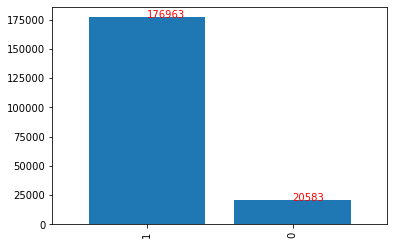

In [175]:
s = df33_new['label'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.label + 0.2 , v.label, color='red')

Observations:
    
    1.We can clearly see that there is class imbalance.

Observations:
    
    1.We are not going to do undersampling because there is huge data loss.

In [176]:
#!pip install imblearn

# Oversampling Method

In [177]:
#conda install -c conda-forge imbalanced-learn

In [178]:
x1=x.replace(np.NaN,x['rental90'].mean())
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xs=scale.fit_transform(x1)


In [179]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(xs,y)

In [180]:
x_smote,y_smote=SM.fit_sample(xs,y)

In [181]:
#Lets check which is better

In [182]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.24,random_state=43)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('normal accuracy score:',accuracy_score(y_test,pred))

normal accuracy score: 0.8949843921370118


In [183]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.24,random_state=43)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score by oversampling:',accuracy_score(y_test,pred))

accuracy score by oversampling: 0.7324205643784656


In [184]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.24,random_state=43)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score by smote :',accuracy_score(y_test,pred))

accuracy score by smote : 0.7323499287757673


Observations:
    
    1.From the accuracy score what we have got we can say that we can use x1,y for further procedures.

In [185]:
x1.head()

,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90,payback90
0,13.002976,2.526572,11.545503,1.259921,2.758924,14.546423,1.259921,2.289428,2.449490,3.072317
1,16.651210,3.931236,17.953584,1.000000,0.000000,17.953584,1.000000,2.289428,3.464102,0.000000
2,11.158459,3.107307,11.545503,1.000000,0.000000,11.545503,1.000000,1.817121,2.449490,0.000000
3,3.642212,2.328576,9.820117,1.000000,0.000000,9.820117,1.259921,2.289428,2.449490,0.000000
4,6.725252,3.212376,13.217256,2.000000,1.259921,28.641646,1.912931,3.476027,2.449490,1.326352


In [186]:
x1.shape

(197546, 10)

In [187]:
y.shape

(197546,)

# Building the models

In [188]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.24,random_state=43)

In [190]:
print('x_train shape is :',x_train.shape)
print('\n')
print('x_test shape is :',x_test.shape)
print('\n')
print('y_train shape is :',y_train.shape)
print('\n')
print('y_test shape is :',y_test.shape)

x_train shape is : (150134, 10)


x_test shape is : (47412, 10)


y_train shape is : (150134,)


y_test shape is : (47412,)


In [191]:
#Finding the best random state

Observations:
    
    we cant find best random state as of now because its taking hours for processing.

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.23,random_state=45)

In [192]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.895
classification report is
              precision    recall  f1-score   support

           0       0.12      0.00      0.00      4766
           1       0.90      1.00      0.94     40670

    accuracy                           0.89     45436
   macro avg       0.51      0.50      0.47     45436
weighted avg       0.81      0.89      0.85     45436

confusion matrix is
[[    1  4765]
 [    7 40663]]




In [193]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')
   

accuracy score through GaussianNB is 
0.751
classification report is
              precision    recall  f1-score   support

           0       0.25      0.68      0.36      4766
           1       0.95      0.76      0.84     40670

    accuracy                           0.75     45436
   macro avg       0.60      0.72      0.60     45436
weighted avg       0.88      0.75      0.79     45436

confusion matrix is
[[ 3249  1517]
 [ 9811 30859]]




In [194]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.898
classification report is
              precision    recall  f1-score   support

           0       0.97      0.02      0.05      4766
           1       0.90      1.00      0.95     40670

    accuracy                           0.90     45436
   macro avg       0.94      0.51      0.50     45436
weighted avg       0.91      0.90      0.85     45436

confusion matrix is
[[  116  4650]
 [    3 40667]]




In [195]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.864
classification report is
              precision    recall  f1-score   support

           0       0.36      0.39      0.38      4766
           1       0.93      0.92      0.92     40670

    accuracy                           0.86     45436
   macro avg       0.65      0.65      0.65     45436
weighted avg       0.87      0.86      0.87     45436

confusion matrix is
[[ 1858  2908]
 [ 3254 37416]]




In [196]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.901
classification report is
              precision    recall  f1-score   support

           0       0.55      0.31      0.40      4766
           1       0.92      0.97      0.95     40670

    accuracy                           0.90     45436
   macro avg       0.74      0.64      0.67     45436
weighted avg       0.88      0.90      0.89     45436

confusion matrix is
[[ 1489  3277]
 [ 1213 39457]]




In [197]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.901
classification report is
              precision    recall  f1-score   support

           0       0.71      0.10      0.17      4766
           1       0.90      1.00      0.95     40670

    accuracy                           0.90     45436
   macro avg       0.81      0.55      0.56     45436
weighted avg       0.88      0.90      0.87     45436

confusion matrix is
[[  454  4312]
 [  181 40489]]




In [198]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.906
classification report is
              precision    recall  f1-score   support

           0       0.60      0.31      0.41      4766
           1       0.92      0.98      0.95     40670

    accuracy                           0.91     45436
   macro avg       0.76      0.64      0.68     45436
weighted avg       0.89      0.91      0.89     45436

confusion matrix is
[[ 1478  3288]
 [ 1000 39670]]




# Checking for cross validations

In [199]:
#cross val score for lg
score=cross_val_score(lg,x1,y,cv=5)
print(lg,'score is:')
print(round((score.mean()),3))
print('\n')

LogisticRegression() score is:
0.896




In [200]:
#cross val score for gnb
score=cross_val_score(gnb,x1,y,cv=5)
print(gnb,'score is:')
print(round((score.mean()),3))
print('\n')

GaussianNB() score is:
0.751




Observations:
    
    1.The difference between maximum accuracy and accuracy through logistic regression is 0.011, since cross validation scores arent computed for all the models even after processing for more than 14 hours, so i choose logistic regression for analysis based on the reasons it differs only 0.011 from highest accuracy and the difference between accuracy score and cross val score is 0.001 infering that there is no overfitting.

# Hyper parameter tuning

In [197]:
grid_param={
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gd_sr=GridSearchCV(estimator=lg,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x1,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'penalty': 'none', 'solver': 'newton-cg'}
0.8956648076603224


In [199]:
lg1=LogisticRegression(penalty='none',solver='newton-cg')
lg1.fit(x_train,y_train)
pred=lg1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.895
classification report is
              precision    recall  f1-score   support

           0       0.12      0.00      0.00      4766
           1       0.90      1.00      0.94     40670

    accuracy                           0.89     45436
   macro avg       0.51      0.50      0.47     45436
weighted avg       0.81      0.89      0.85     45436

confusion matrix is
[[    1  4765]
 [    7 40663]]




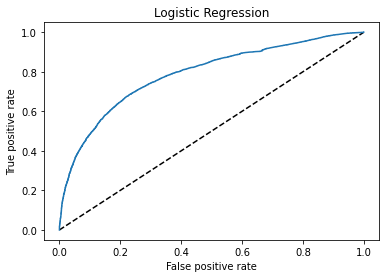

0.5000188512577978

In [202]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg1.predict(x_test))
auc_score

Observations:
    
    1.since auc_score is in the range of 0.5 to 1 hence its a useful model for classifications.

# Saving the model

In [258]:
import joblib
joblib.dump(lg1,'Micro Creditlg.obj')

['Micro Creditlg.obj']